In [1]:
import gymnasium as gym
import numpy as np
import cv2
from collections import defaultdict
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
env = gym.make("CarRacing-v3", render_mode=None, max_episode_steps=300)

In [3]:
ACTIONS = {
    0: np.array([0.0, 0.0, 0.0], dtype=np.float64),
    1: np.array([1.0, 0.0, 0.0], dtype=np.float64),
    2: np.array([-1.0, 0.0, 0.0], dtype=np.float64),
    3: np.array([0.0, 1.0, 0.0], dtype=np.float64),
    4: np.array([0.0, 0.0, 0.5], dtype=np.float64)
}


In [4]:
def preprocess(obs):
    # grayscale
    gray = cv2.cvtColor(obs, cv2.COLOR_BGR2GRAY)
    small = cv2.resize(gray, (10, 10))
    bins = np.linspace(0, 256, num=3, endpoint=False)
    return tuple(bins.flatten())

In [5]:
Q = defaultdict(lambda: np.zeros(len(ACTIONS)))

In [6]:
episode_rewards = []
log_every = 10               # episodes
window = 50                  # rolling average window
alpha = 0.1      # learning rate
gamma = 0.99     # discount
epsilon = 1.0    # exploration
epsilon_min = 0.05
epsilon_decay = 0.995

for episodes in tqdm(range(500)):
    obs, _ = env.reset()
    state = preprocess(obs)
    terminated = False
    truncated = False
    total_reward = 0
    while not (terminated or truncated):
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            action = random.randint(0, len(ACTIONS) - 1)
        else:
            action = np.argmax(Q[state])
        
        next_obs, reward, terminated, truncated, _ = env.step(ACTIONS[action])
        next_state = preprocess(next_obs)

        # Q-learning update
        Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])
        state = next_state
        total_reward += reward
    episode_rewards.append(total_reward)
    
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    if (episodes + 1) % log_every == 0:
        recent = episode_rewards[-window:]
        avg_reward = sum(recent) / len(recent)

        tqdm.write(
            f"Ep {episodes+1:4d} | "
            f"AvgReward({window}): {avg_reward:7.2f} | "
            f"Epsilon: {epsilon:.3f}"
        )


  2%|▏         | 10/500 [01:16<1:26:32, 10.60s/it]

Ep   10 | AvgReward(50):  -12.51 | Epsilon: 0.951


  4%|▍         | 20/500 [01:51<29:02,  3.63s/it]  

Ep   20 | AvgReward(50):  -10.48 | Epsilon: 0.905


  6%|▌         | 30/500 [02:22<24:39,  3.15s/it]

Ep   30 | AvgReward(50):  -10.52 | Epsilon: 0.860


  8%|▊         | 40/500 [02:47<17:24,  2.27s/it]

Ep   40 | AvgReward(50):  -10.31 | Epsilon: 0.818


 10%|█         | 50/500 [03:11<17:35,  2.35s/it]

Ep   50 | AvgReward(50):  -10.48 | Epsilon: 0.778


 12%|█▏        | 60/500 [03:33<16:11,  2.21s/it]

Ep   60 | AvgReward(50):   -9.41 | Epsilon: 0.740


 14%|█▍        | 70/500 [03:57<18:31,  2.58s/it]

Ep   70 | AvgReward(50):   -9.35 | Epsilon: 0.704


 16%|█▌        | 80/500 [04:28<21:58,  3.14s/it]

Ep   80 | AvgReward(50):   -8.76 | Epsilon: 0.670


 18%|█▊        | 90/500 [04:55<17:45,  2.60s/it]

Ep   90 | AvgReward(50):   -8.43 | Epsilon: 0.637


 20%|██        | 100/500 [05:22<16:28,  2.47s/it]

Ep  100 | AvgReward(50):   -7.84 | Epsilon: 0.606


 22%|██▏       | 110/500 [05:43<14:16,  2.20s/it]

Ep  110 | AvgReward(50):   -6.78 | Epsilon: 0.576


 24%|██▍       | 120/500 [06:06<15:12,  2.40s/it]

Ep  120 | AvgReward(50):   -7.18 | Epsilon: 0.548


 26%|██▌       | 130/500 [06:36<18:30,  3.00s/it]

Ep  130 | AvgReward(50):   -7.40 | Epsilon: 0.521


 28%|██▊       | 140/500 [07:03<15:54,  2.65s/it]

Ep  140 | AvgReward(50):   -6.27 | Epsilon: 0.496


 30%|███       | 150/500 [07:28<15:25,  2.65s/it]

Ep  150 | AvgReward(50):   -5.18 | Epsilon: 0.471


 32%|███▏      | 160/500 [07:54<15:24,  2.72s/it]

Ep  160 | AvgReward(50):   -6.90 | Epsilon: 0.448


 34%|███▍      | 170/500 [08:21<14:36,  2.66s/it]

Ep  170 | AvgReward(50):   -6.57 | Epsilon: 0.427


 36%|███▌      | 180/500 [08:47<13:58,  2.62s/it]

Ep  180 | AvgReward(50):   -4.42 | Epsilon: 0.406


 38%|███▊      | 190/500 [09:13<13:26,  2.60s/it]

Ep  190 | AvgReward(50):   -3.83 | Epsilon: 0.386


 40%|████      | 200/500 [09:40<13:50,  2.77s/it]

Ep  200 | AvgReward(50):   -5.02 | Epsilon: 0.367


 42%|████▏     | 210/500 [10:06<12:22,  2.56s/it]

Ep  210 | AvgReward(50):   -3.21 | Epsilon: 0.349


 44%|████▍     | 220/500 [10:35<13:40,  2.93s/it]

Ep  220 | AvgReward(50):   -1.58 | Epsilon: 0.332


 46%|████▌     | 230/500 [11:02<12:38,  2.81s/it]

Ep  230 | AvgReward(50):   -0.70 | Epsilon: 0.316


 48%|████▊     | 240/500 [11:30<11:33,  2.67s/it]

Ep  240 | AvgReward(50):    0.61 | Epsilon: 0.300


 50%|█████     | 250/500 [11:57<11:14,  2.70s/it]

Ep  250 | AvgReward(50):    0.73 | Epsilon: 0.286


 52%|█████▏    | 260/500 [12:27<11:32,  2.88s/it]

Ep  260 | AvgReward(50):    1.19 | Epsilon: 0.272


 54%|█████▍    | 270/500 [12:54<10:18,  2.69s/it]

Ep  270 | AvgReward(50):    0.73 | Epsilon: 0.258


 56%|█████▌    | 280/500 [13:22<10:04,  2.75s/it]

Ep  280 | AvgReward(50):    1.11 | Epsilon: 0.246


 58%|█████▊    | 290/500 [13:50<09:26,  2.70s/it]

Ep  290 | AvgReward(50):    1.91 | Epsilon: 0.234


 60%|██████    | 300/500 [14:13<07:21,  2.21s/it]

Ep  300 | AvgReward(50):    4.22 | Epsilon: 0.222


 62%|██████▏   | 310/500 [14:38<08:21,  2.64s/it]

Ep  310 | AvgReward(50):    3.93 | Epsilon: 0.211


 64%|██████▍   | 320/500 [15:06<08:17,  2.76s/it]

Ep  320 | AvgReward(50):    1.25 | Epsilon: 0.201


 66%|██████▌   | 330/500 [15:32<07:11,  2.54s/it]

Ep  330 | AvgReward(50):    1.10 | Epsilon: 0.191


 68%|██████▊   | 340/500 [15:59<07:46,  2.92s/it]

Ep  340 | AvgReward(50):   -0.65 | Epsilon: 0.182


 70%|███████   | 350/500 [16:28<07:15,  2.90s/it]

Ep  350 | AvgReward(50):   -6.21 | Epsilon: 0.173


 72%|███████▏  | 360/500 [16:52<06:01,  2.58s/it]

Ep  360 | AvgReward(50):   -7.79 | Epsilon: 0.165


 74%|███████▍  | 370/500 [17:22<06:10,  2.85s/it]

Ep  370 | AvgReward(50):   -5.08 | Epsilon: 0.157


 76%|███████▌  | 380/500 [17:49<05:41,  2.84s/it]

Ep  380 | AvgReward(50):   -7.76 | Epsilon: 0.149


 78%|███████▊  | 390/500 [18:16<05:01,  2.74s/it]

Ep  390 | AvgReward(50):  -10.67 | Epsilon: 0.142


 80%|████████  | 400/500 [18:43<04:37,  2.78s/it]

Ep  400 | AvgReward(50):   -5.78 | Epsilon: 0.135


 82%|████████▏ | 410/500 [19:07<03:20,  2.23s/it]

Ep  410 | AvgReward(50):   -6.91 | Epsilon: 0.128


 84%|████████▍ | 420/500 [19:35<03:45,  2.82s/it]

Ep  420 | AvgReward(50):  -10.76 | Epsilon: 0.122


 86%|████████▌ | 430/500 [20:02<03:06,  2.66s/it]

Ep  430 | AvgReward(50):  -12.59 | Epsilon: 0.116


 88%|████████▊ | 440/500 [20:28<02:38,  2.64s/it]

Ep  440 | AvgReward(50):  -14.21 | Epsilon: 0.110


 90%|█████████ | 450/500 [20:55<02:13,  2.67s/it]

Ep  450 | AvgReward(50):  -17.66 | Epsilon: 0.105


 92%|█████████▏| 460/500 [21:23<01:50,  2.75s/it]

Ep  460 | AvgReward(50):  -19.74 | Epsilon: 0.100


 94%|█████████▍| 470/500 [21:47<01:17,  2.59s/it]

Ep  470 | AvgReward(50):  -16.09 | Epsilon: 0.095


 96%|█████████▌| 480/500 [22:14<00:53,  2.69s/it]

Ep  480 | AvgReward(50):  -14.43 | Epsilon: 0.090


 98%|█████████▊| 490/500 [22:42<00:28,  2.89s/it]

Ep  490 | AvgReward(50):  -12.10 | Epsilon: 0.086


100%|██████████| 500/500 [23:08<00:00,  2.78s/it]

Ep  500 | AvgReward(50):   -8.75 | Epsilon: 0.082


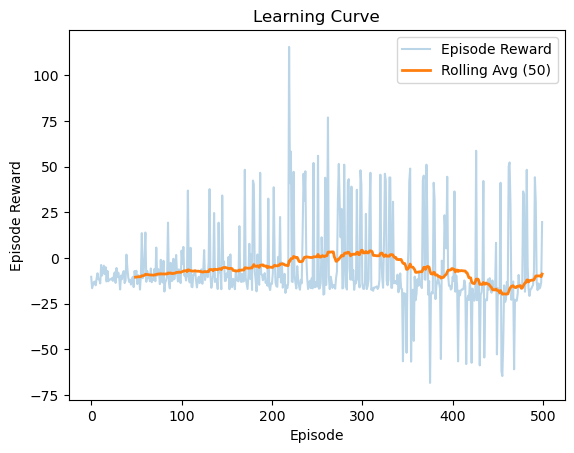

In [7]:
plt.plot(episode_rewards, alpha=0.3, label="Episode Reward")

window = 50
rolling = np.convolve(
    episode_rewards,
    np.ones(window)/window,
    mode="valid"
)

plt.plot(
    range(window-1, len(episode_rewards)),
    rolling,
    linewidth=2,
    label=f"Rolling Avg ({window})"
)

plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Learning Curve")
plt.legend()
plt.show()
